In [1]:
# Introduction    

# This challenge is the capstone project of the Summer Analytics, a primer course on Data Science, conducted by 
# Consulting and Analytics Club of IIT Guwahati in the summers.

# The dataset is provided by DeltaX is the pioneering cross-channel digital advertising platform. 
# The cloud-based platform leverages big data, user behavior, and machine learning algorithms to improve 
# performance across the business funnel of advertisers.

# Problem Statement
# Let's take a case where an advertiser on the platform (DeltaX) would like to estimate the performance of their 
# campaign in the future.

# Imagine it is the first day of March and you are given the past performance data of ads between 1st August to 
# 28th Feb. You are now tasked to predict an ad's future performance (revenue) between March 1st and March 15th. 
# Well, it is now time for you to put on your problem-solving hats and start playing with the data provided under 
# the "data" section.

In [2]:
# Loading Libraries - 
# Importing Basic libraries to play with data and to construct EDA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Importing Libraries to make a Model for the data
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [5]:
# For plotting the regression tree
from IPython.display import Image
import pydotplus

In [6]:
# To remove warnings
import warnings
warnings.filterwarnings('ignore')

In [7]:
# Reading Data
data_train = pd.read_csv('Train_Data.csv')
data_test = pd.read_csv('Test_Data.csv')

In [8]:
# Data Description

# date: the date on which the ad was made live
# campaign: campaign number
# adgroup: adgroup number
# ad: ad number
# impressions - Number of time the ad was shown
# clicks - Number of time the ad clicked shown
# cost - Amount spent to show ad
# conversions - Number of transactions received
# revenue: revenue generated from the ad

# Our goal is to predict the revenue from Test data with a low RMSE score.

In [9]:
# File structure and content
data_train.head()
data_test.head()

print("Row: ", data_train.shape[0])
print("Col: ", data_train.shape[1])

print("Row: ", data_test.shape[0])
print("Col: ", data_test.shape[1])

data_train.info()
data_test.info()


Row:  4571
Col:  9
Row:  318
Col:  8
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4571 entries, 0 to 4570
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         4571 non-null   object 
 1   campaign     4571 non-null   object 
 2   adgroup      4571 non-null   object 
 3   ad           4571 non-null   object 
 4   impressions  4571 non-null   int64  
 5   clicks       4571 non-null   int64  
 6   cost         4571 non-null   float64
 7   conversions  4571 non-null   int64  
 8   revenue      4571 non-null   float64
dtypes: float64(2), int64(3), object(4)
memory usage: 321.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318 entries, 0 to 317
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         318 non-null    object 
 1   campaign     318 non-null    object 
 2   adgroup      318 non-null    object 
 3   ad          

In [10]:
# Summary:

# The data_train data have 4571 rows and 9 columns.
# The data_test data have 318 rows and 8 columns.
# There are no missing data in both data_train and data_test.

In [11]:
# Exploratory Data Analysis(EDA)
data_train.describe()

,impressions,clicks,cost,conversions,revenue
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340
std,198.349737,100.164913,14.361618,5.223922,1091.742763
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000


<AxesSubplot:xlabel='adgroup', ylabel='count'>

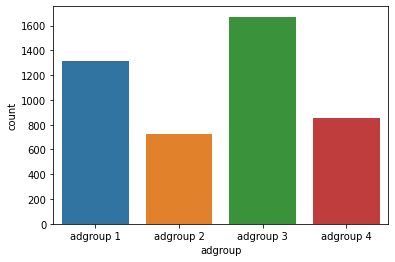

In [12]:
sns.countplot("adgroup", data = data_train)
# There are 4 adgroups in adgroup column which will be converted into numerical variable by 
# creating dummy variable.

<AxesSubplot:xlabel='campaign', ylabel='count'>

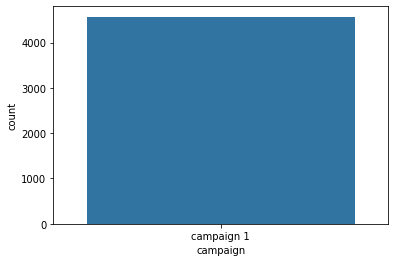

In [13]:
data_train.campaign.value_counts()
sns.countplot("campaign", data = data_train)
# We can see that there is only 1 campaign. So taking campaign column into consideration is meaningless.

In [14]:
data_train["ad"].value_counts().sort_values()
# We can see that there are 70 types of ads in ad column in data_train.

ad 51      3
ad 69      4
ad 47      4
ad 36      4
ad 31      4
        ... 
ad 32    377
ad 7     461
ad 2     512
ad 1     587
ad 3     617
Name: ad, Length: 70, dtype: int64

<AxesSubplot:xlabel='revenue', ylabel='cost'>

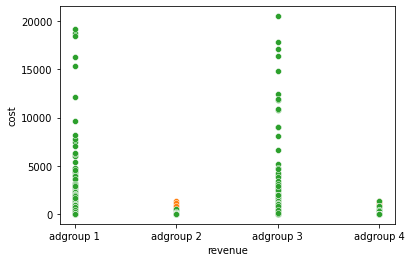

In [15]:
sns.scatterplot(x = data_train["revenue"], y = data_train["cost"])
sns.scatterplot(x = "conversions", y = "revenue", data = data_train)
sns.scatterplot(x = "adgroup", y = "revenue", data = data_train)

<AxesSubplot:title={'center':'Correlation Analysis'}>

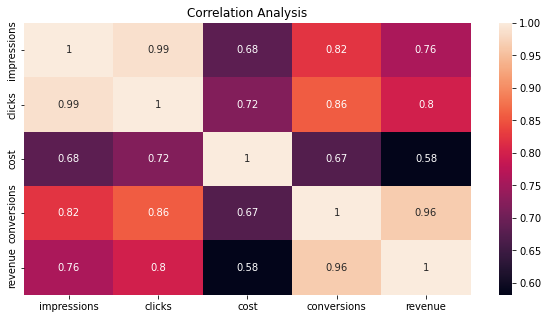

In [16]:
plt.figure(figsize=(10, 5))
plt.title("Correlation Analysis")
sns.heatmap(data_train.corr(), annot = True)

In [17]:
# Note:
# The variable conversion is highly positively correlated to our target variable revenue.
# The cost is least positively correlated with revenue.
# There is only positive relationship between the variables in our dataset.

In [18]:
# Adding Feature
def Add(x):
    x["CTR"] = x["clicks"] / x["impressions"]
    x["CPC"] = x["cost"] / x["clicks"]
    x["CPA"] = x["cost"] / x["conversions"]
    return x

In [19]:
Add(data_train)
Add(data_test)
data_train.head()

,date,campaign,adgroup,ad,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
0,01-08-2020,campaign 1,adgroup 1,ad 1,24,6,0.08,0,0.00,0.250000,0.013333,inf
1,01-08-2020,campaign 1,adgroup 2,ad 1,1,0,0.00,0,0.00,0.000000,NaN,NaN
2,01-08-2020,campaign 1,adgroup 3,ad 1,13,4,0.04,0,0.00,0.307692,0.010000,inf
3,01-08-2020,campaign 1,adgroup 4,ad 1,5,4,0.08,0,0.00,0.800000,0.020000,inf
4,01-08-2020,campaign 1,adgroup 1,ad 2,247,126,1.29,4,925.71,0.510121,0.010238,0.3225


In [20]:
data_train = data_train.replace(np.inf, np.nan)
data_train = data_train.fillna(0)
data_test = data_test.replace(np.inf, np.nan)
data_test = data_test.fillna(0)

In [21]:
data_train.isnull().sum()
data_train.describe()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.635747,43.340844,2.800834,1.339094,231.865340,0.439934,0.059030,0.556686
std,198.349737,100.164913,14.361618,5.223922,1091.742763,0.232061,0.135018,2.011103
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.333333,0.010610,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.451389,0.015556,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.533333,0.055000,0.220000
max,3239.000000,1771.000000,531.250000,94.000000,20515.410000,2.000000,3.810000,57.450000


In [22]:
# Treating Outliers
data_train.cost.sort_values(ascending = False)
data_train.impressions.sort_values(ascending = False)
data_train.clicks.sort_values(ascending = False)
data_train.CPC.sort_values(ascending = False)
data_train.CPA.sort_values(ascending = False)

982     57.450000
1792    25.615000
1356    24.980000
1231    24.403333
1298    22.980000
          ...    
1840     0.000000
1841     0.000000
1843     0.000000
1844     0.000000
4570     0.000000
Name: CPA, Length: 4571, dtype: float64

In [23]:
# By using this, we found that there are outliers in Cost, impressions, clicks, CPC and CPA. 
# So, we will treat it in the next line.

In [24]:
data_train.cost[(data_train.cost > 300)] = 300
data_train.impressions[(data_train.impressions > 2200)] = 2200
data_train.clicks[(data_train.clicks > 1200)] = 1200
data_train.CPC[(data_train.CPC > 2.5)] = 2.5
data_train.CPA[(data_train.CPA > 27)] = 27

In [25]:
data_train.describe()

,impressions,clicks,cost,conversions,revenue,CTR,CPC,CPA
count,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000,4571.000000
mean,92.408445,43.215926,2.750243,1.339094,231.865340,0.439934,0.058744,0.550024
std,195.315435,98.349439,12.824752,5.223922,1091.742763,0.232061,0.128277,1.867945
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,2.000000,0.040000,0.000000,0.000000,0.333333,0.010610,0.000000
50%,16.000000,7.000000,0.210000,0.000000,0.000000,0.451389,0.015556,0.000000
75%,84.000000,38.000000,1.350000,1.000000,92.600000,0.533333,0.055000,0.220000
max,2200.000000,1200.000000,300.000000,94.000000,20515.410000,2.000000,2.500000,27.000000


In [26]:
# For Training data
X_train = data_train.drop(["date", "revenue", "campaign", "ad"], axis = 1)
X_train = pd.get_dummies(X_train)
X_train.head()

y_train = data_train["revenue"]
y_train.head()

0      0.00
1      0.00
2      0.00
3      0.00
4    925.71
Name: revenue, dtype: float64

In [27]:
# For Test data
X_test = data_test.drop(["date", "campaign", "ad"], axis = 1)
X_test = pd.get_dummies(X_test)
X_test.head()

,cost,impressions,clicks,conversions,CTR,CPC,CPA,adgroup_adgroup 1,adgroup_adgroup 2,adgroup_adgroup 3,adgroup_adgroup 4
0,0.58,121,49,1,0.404959,0.011837,0.58,1,0,0,0
1,0.17,22,12,0,0.545455,0.014167,0.00,0,0,1,0
2,0.05,5,3,0,0.600000,0.016667,0.00,0,0,0,1
3,0.01,2,1,0,0.500000,0.010000,0.00,0,1,0,0
4,0.01,3,1,0,0.333333,0.010000,0.00,0,1,0,0


In [28]:
# Regression Tree
# Got the best value for the parameters by using Grid Search CV
regtree = tree.DecisionTreeRegressor(criterion = "mse", 
                                     max_depth = 6, 
                                     max_features = "auto", 
                                     min_samples_split = 2, 
                                     splitter = "best", 
                                     random_state = 0)

regtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=6, max_features='auto',
                      random_state=0)

In [29]:
y_train_pred = regtree.predict(X_train)
y_test_pred = regtree.predict(X_test)

In [30]:
print("RMSE score for Training data: ", np.sqrt(mean_squared_error(y_train, y_train_pred)))
print("R2 score for Training data: ", r2_score(y_train, y_train_pred))

RMSE score for Training data:  138.5800188426886
R2 score for Training data:  0.9838840611930215


In [31]:
# creating a csv file for the prediction data
res = pd.DataFrame(y_test_pred)
res.index = X_test.index
res.columns = ["revenue"]
res.to_csv("prediction_results.csv", index = False) 

In [32]:
res.describe()
res.head()

,revenue
0,141.440425
1,0.000000
2,0.000000
3,0.000000
4,0.000000


In [33]:
# The RMSE score for our Testing data is around 137.89 which is very near to our training model RMSE score 138.58, 
# which shows that the model is good for predicting revenue.

In [34]:
# Creating Image for Regression Tree
dot_data = tree.export_graphviz(regtree, out_file = None, 
                                feature_names = X_test.columns, filled = True)

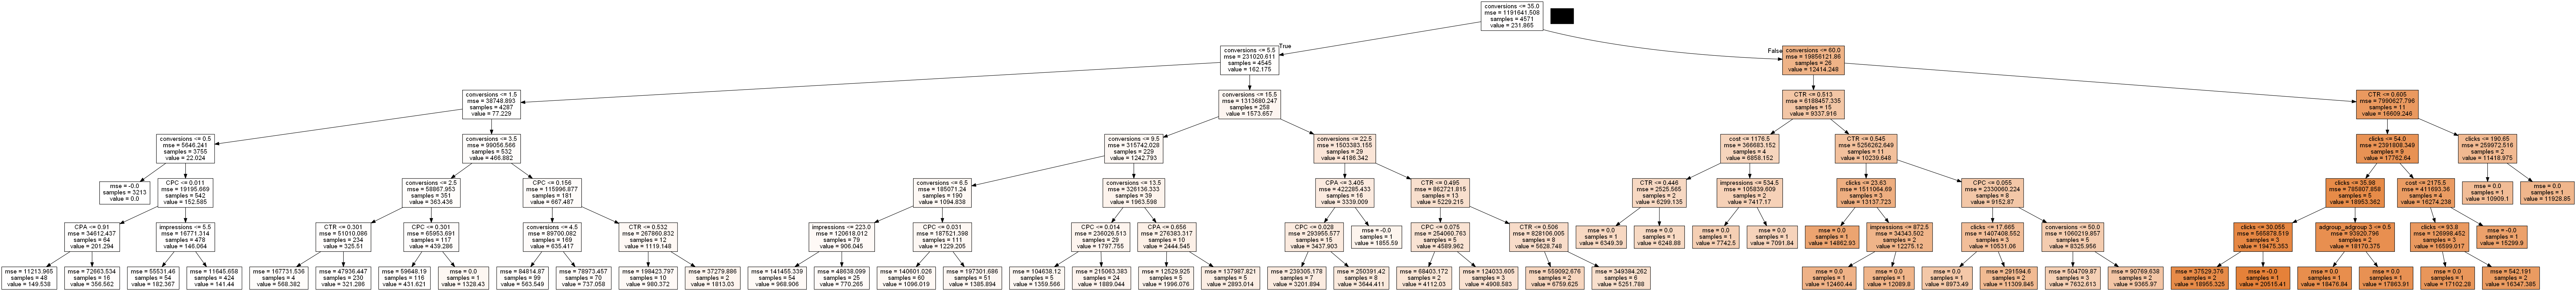

In [35]:
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [36]:
# Grid Search CV

In [37]:
params_grid = {"min_samples_split": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               "max_depth": [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
               "max_features": ["auto", "sqrt", "log2"],
                "criterion": ["mse", "friedman_mse", "mae"]}

In [38]:
grid_search = GridSearchCV(regtree, params_grid, n_jobs = -1, cv = 5)

In [39]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeRegressor(criterion='mse', max_depth=6,
                                             max_features='auto',
                                             random_state=0),
             n_jobs=-1,
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9,
                                               10]})

In [40]:
grid_search.best_params_

{'criterion': 'mse',
 'max_depth': 5,
 'max_features': 'auto',
 'min_samples_split': 2}

In [41]:
# The above are the best parameters for our regression tree model

In [42]:
curf_clf = grid_search.best_estimator_
print("R2 sccore of Training data: ", r2_score(y_train, curf_clf.predict(X_train)))

R2 sccore of Training data:  0.9793695836884997


In [43]:
print("RMSE of Training Data: ", np.sqrt(mean_squared_error(y_train, curf_clf.predict(X_train))))

RMSE of Training Data:  156.79304960253893
